In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/intel-image-classification-dataset/seg_train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/intel-image-classification-dataset/seg_test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/intel-image-classification-dataset/seg_train/forest')))
print(len(os.listdir('/content/drive/MyDrive/intel-image-classification-dataset/seg_train/mountain')))
print(len(os.listdir('/content/drive/MyDrive/intel-image-classification-dataset/seg_test/forest')))
print(len(os.listdir('/content/drive/MyDrive/intel-image-classification-dataset/seg_test/mountain')))

2271
2512
474
525


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 3827 images belonging to 2 classes.
Found 956 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']
) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


120/120 ━━━━━━━━━━━━━━━━━━━━ 801s 6s/step - accuracy: 0.8708 - loss: 0.5193 - val_accuracy: 0.9341 - val_loss: 0.2155
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 672s 6s/step - accuracy: 0.9752 - loss: 0.0816 - val_accuracy: 0.9686 - val_loss: 0.1117
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 627s 5s/step - accuracy: 0.9783 - loss: 0.0731 - val_accuracy: 0.9780 - val_loss: 0.0812
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 685s 5s/step - accuracy: 0.9868 - loss: 0.0529 - val_accuracy: 0.9770 - val_loss: 0.1028
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 621s 5s/step - accuracy: 0.9883 - loss: 0.0373 - val_accuracy: 0.9655 - val_loss: 0.1354
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 633s 5s/step - accuracy: 0.9892 - loss: 0.0372 - val_accuracy: 0.9791 - val_loss: 0.1178
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 621s 5s/step - accuracy: 0.9971 - loss: 0.0143 - val_accuracy: 0.9780 - val_loss: 0.1094
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 628s 5s/step - accuracy: 0.9955 - loss: 0.0162 - val_accuracy: 0.966

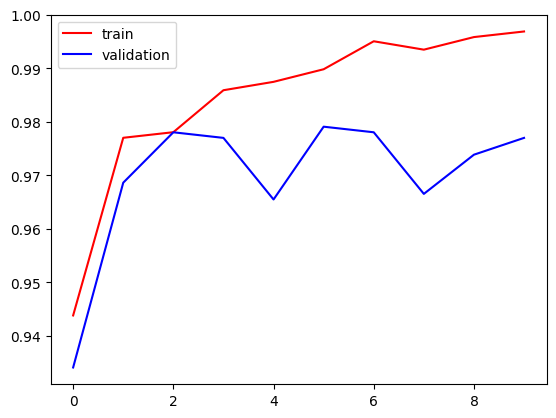

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

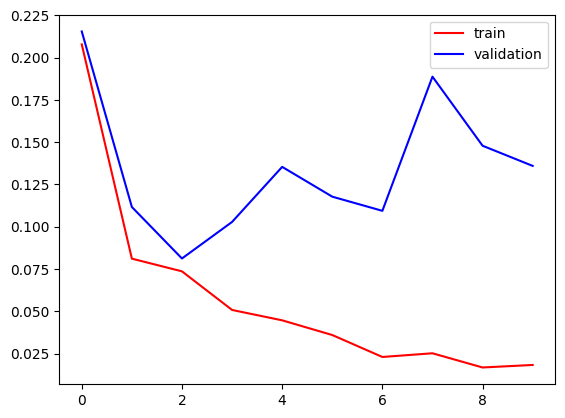

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 999 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)


32/32 ━━━━━━━━━━━━━━━━━━━━ 147s 5s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       474
           1       0.54      0.54      0.54       525

    accuracy                           0.52       999
   macro avg       0.52      0.52      0.52       999
weighted avg       0.52      0.52      0.52       999



There is overfitting and hence applying Batchnormalisation and Dropout techniques to handle overfitting

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 976s 8s/step - accuracy: 0.9225 - loss: 2.7670 - val_accuracy: 0.5251 - val_loss: 27.2098
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 961s 8s/step - accuracy: 0.9773 - loss: 0.5740 - val_accuracy: 0.8891 - val_loss: 1.4076
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 986s 8s/step - accuracy: 0.9634 - loss: 1.0620 - val_accuracy: 0.9048 - val_loss: 1.5913
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 970s 8s/step - accuracy: 0.9780 - loss: 0.3555 - val_accuracy: 0.9362 - val_loss: 1.9981
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 991s 8s/step - accuracy: 0.9761 - loss: 0.4603 - val_accuracy: 0.9780 - val_loss: 0.3730
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1010s 8s/step - accuracy: 0.9844 - loss: 0.1479 - val_accuracy: 0.9331 - val_loss: 0.7499
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 988s 8s/step - accuracy: 0.9824 - loss: 0.1594 - val_accuracy: 0.9749 - val_loss: 0.3277
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 950s 8s/step - accuracy: 0.9842 - loss: 0.1184 - val_ac

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 999 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)

32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       474
           1       0.53      1.00      0.69       525

    accuracy                           0.53       999
   macro avg       0.76      0.50      0.35       999
weighted avg       0.75      0.53      0.37       999



Using Pre-trained model - MobileNetV2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

#MobileNetV2 is a pre-trained model
# Load the MobileNetV2 model with pre-trained weights (excluding the top layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the base model
base_model.trainable = False

# Create the model with custom top layers
pretrained_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

<ipython-input-37-75ef61665bd0>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


In [ ]:
from keras.optimizers import Adam
pretrained_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = pretrained_model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 338s 3s/step - accuracy: 0.9441 - loss: 0.1115 - val_accuracy: 0.9937 - val_loss: 0.0290
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.9929 - loss: 0.0272 - val_accuracy: 0.9906 - val_loss: 0.0271
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.9951 - loss: 0.0159 - val_accuracy: 0.9937 - val_loss: 0.0368
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - accuracy: 0.9964 - loss: 0.0150 - val_accuracy: 0.9916 - val_loss: 0.0295
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 311s 3s/step - accuracy: 0.9966 - loss: 0.0104 - val_accuracy: 0.9927 - val_loss: 0.0370
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 312s 3s/step - accuracy: 0.9978 - loss: 0.0078 - val_accuracy: 0.9916 - val_loss: 0.0271
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.9983 - loss: 0.0085 - val_accuracy: 0.9927 - val_loss: 0.0249
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.9972 - loss: 0.0119 - val_accu

In [ ]:
predictions = pretrained_model.predict(test_data)

32/32 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       474
           1       0.53      0.53      0.53       525

    accuracy                           0.51       999
   macro avg       0.50      0.50      0.50       999
weighted avg       0.51      0.51      0.51       999

